<a href="https://colab.research.google.com/github/David-Junior/Lab-Reports-Undergrad-/blob/main/FMM3_251_Material_Science_I_Hardness_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
D = 10 #mm
time_interval = 30 #seconds
load = np.array([250, 500, 1000, 1500, 2000, 2500, 3000]) #kg
d_steel = np.array([1.85, 2.20, 2.95, 3.95, 4.35, 5.30, 5.30])
d_al = np.array([2.80, 2.80, 3.90, 4.20, 4.40, 4.80, 5.50])

def BHN(P, D, d):
  return 2*P/(np.pi*D*(D-np.sqrt(D**2-d**2)))

BHN_steel = BHN(load, D, d_steel)
BHN_al = BHN(load, D, d_al)

def CSA(D, d):
  return np.pi*D*(D-np.sqrt(D**2-d**2))/2

SA_steel = CSA(D, d_steel)
SA_al = CSA(D, d_al)

log_P = np.log10(load)
log_d_steel = np.log10(d_steel)
log_d_al = np.log10(d_al)

def MHN(P, d): #Pm
  return 4*P/(np.pi*d**2)

MHN_steel = MHN(load, d_steel)
MHN_al = MHN(load, d_al)

d_steel_D = d_steel/D
d_al_D = d_al/D

stress_steel = MHN_steel/3.6
stress_al = MHN_al/3.6

strain_steel = 0.2*(d_steel/D)
strain_al = 0.2*(d_al/D)



In [2]:
import pandas as pd

# Create DataFrame for Steel
data_steel = {
    'Load P (kg)': load,
    'Diameter d (mm)': d_steel,
    'CSA (mm^2)': SA_steel,
    'BHN': BHN_steel,
    'log P': log_P,
    'log d': log_d_steel,
    'MHN': MHN_steel,
    'd/D': d_steel_D,
    'True stress': stress_steel,
    'True strain': strain_steel
}
df_steel = pd.DataFrame(data_steel)

# Create DataFrame for Aluminum
data_al = {
    'Load P (kg)': load,
    'Diameter d (mm)': d_al,
    'CSA (mm^2)': SA_al,
    'BHN': BHN_al,
    'log P': log_P,
    'log d': log_d_al,
    'MHN': MHN_al,
    'd/D': d_al_D,
    'True stress': stress_al,
    'True strain': strain_al
}
df_al = pd.DataFrame(data_al)

In [3]:
df_steel.round(2)

,Load P (kg),Diameter d (mm),CSA (mm^2),BHN,log P,log d,MHN,d/D,True stress,True strain
0,250,1.85,2.71,92.20,2.40,0.27,93.01,0.18,25.83,0.04
1,500,2.20,3.85,129.92,2.70,0.34,131.53,0.22,36.54,0.04
2,1000,2.95,6.99,143.05,3.00,0.47,146.31,0.30,40.64,0.06
3,1500,3.95,12.77,117.43,3.18,0.60,122.41,0.40,34.00,0.08
4,2000,4.35,15.64,127.87,3.30,0.64,134.57,0.43,37.38,0.09
5,2500,5.30,23.88,104.71,3.40,0.72,113.32,0.53,31.48,0.11
6,3000,5.30,23.88,125.65,3.48,0.72,135.98,0.53,37.77,0.11


In [4]:
df_al.round(2)

,Load P (kg),Diameter d (mm),CSA (mm^2),BHN,log P,log d,MHN,d/D,True stress,True strain
0,250,2.8,6.28,39.79,2.40,0.45,40.60,0.28,11.28,0.06
1,500,2.8,6.28,79.58,2.70,0.45,81.20,0.28,22.56,0.06
2,1000,3.9,12.44,80.40,3.00,0.59,83.71,0.39,23.25,0.08
3,1500,4.2,14.53,103.26,3.18,0.62,108.27,0.42,30.07,0.08
4,2000,4.4,16.02,124.82,3.30,0.64,131.53,0.44,36.54,0.09
5,2500,4.8,19.28,129.68,3.40,0.68,138.16,0.48,38.38,0.10
6,3000,5.5,25.89,115.86,3.48,0.74,126.27,0.55,35.08,0.11


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


In [6]:
from scipy import stats
import numpy as np

# --- For Steel ---
# Perform linear regression for log P vs log d for steel
slope_steel, intercept_steel, r_value_steel, p_value_steel, std_err_steel = stats.linregress(df_steel['log d'], df_steel['log P'])

n_steel = slope_steel
log_k_steel = intercept_steel
k_steel = 10**log_k_steel

print(f"--- Steel Meyer's Law Constants ---")
print(f"n (work-hardening exponent): {n_steel:.4f}")
print(f"log(k) (intercept): {log_k_steel:.4f}")
print(f"k (hardness coefficient): {k_steel:.4f}")
print(f"R-squared: {r_value_steel**2:.4f}\n")

# --- For Aluminum ---
# Perform linear regression for log P vs log d for aluminum
slope_al, intercept_al, r_value_al, p_value_al, std_err_al = stats.linregress(df_al['log d'], df_al['log P'])

n_al = slope_al
log_k_al = intercept_al
k_al = 10**log_k_al

print(f"--- Aluminum Meyer's Law Constants ---")
print(f"n (work-hardening exponent): {n_al:.4f}")
print(f"log(k) (intercept): {log_k_al:.4f}")
print(f"k (hardness coefficient): {k_al:.4f}")
print(f"R-squared: {r_value_al**2:.4f}")

--- Steel Meyer's Law Constants ---
n (work-hardening exponent): 2.1373
log(k) (intercept): 1.9152
k (hardness coefficient): 82.2628
R-squared: 0.9763

--- Aluminum Meyer's Law Constants ---
n (work-hardening exponent): 3.3963
log(k) (intercept): 1.0391
k (hardness coefficient): 10.9432
R-squared: 0.9337


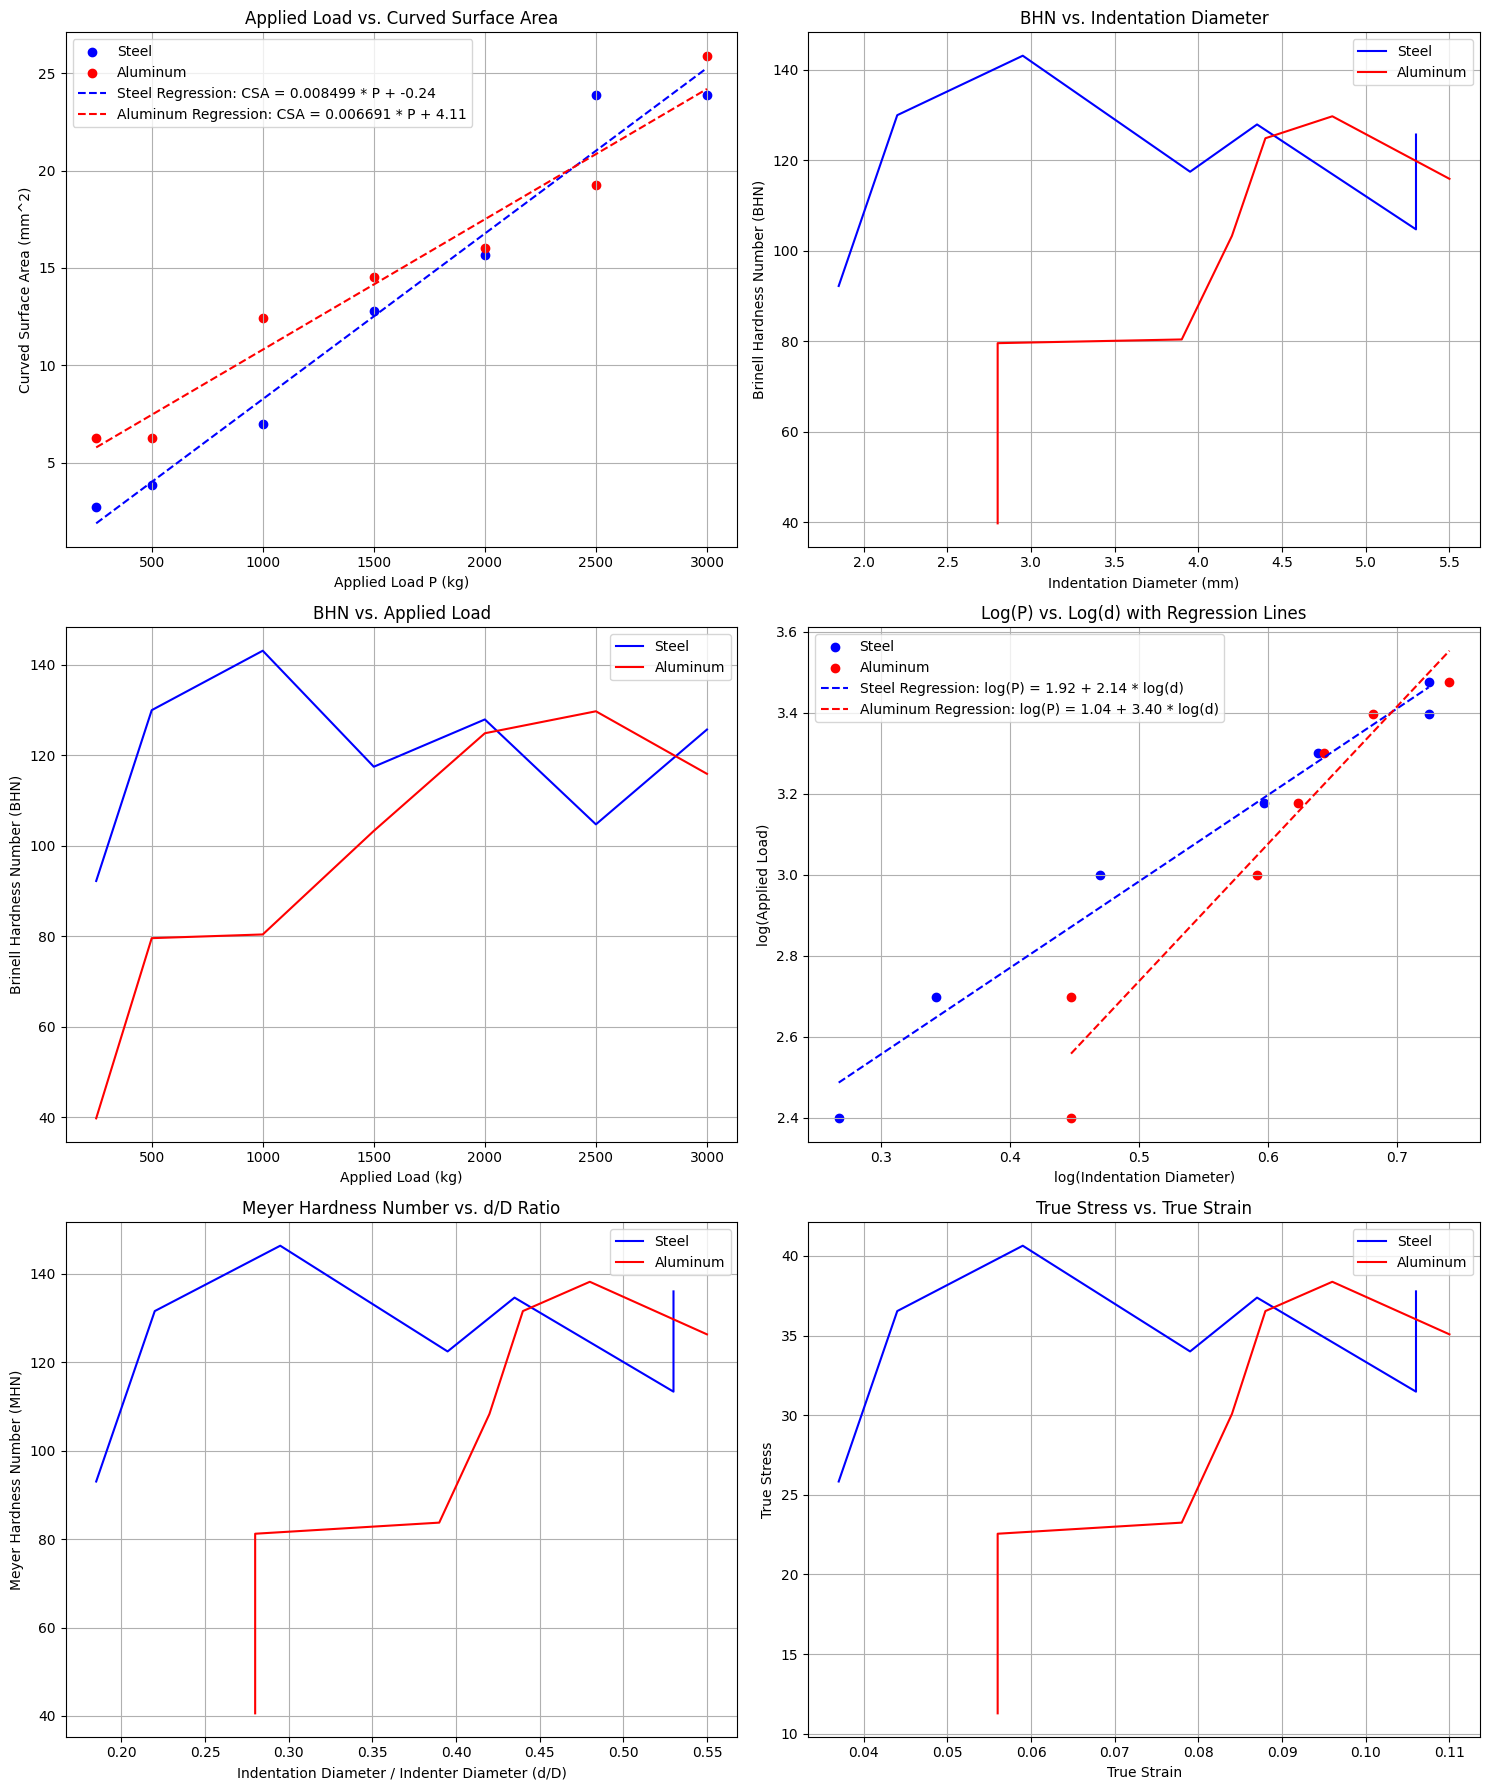

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# 1. Applied load (P) vs. Curved Surface Area (CSA)
axes[0].scatter(df_steel['Load P (kg)'], df_steel['CSA (mm^2)'], label='Steel', color='blue')
axes[0].scatter(df_al['Load P (kg)'], df_al['CSA (mm^2)'], label='Aluminum', color='red')

ax0_slope_steel, ax0_intercept_steel = np.polyfit(df_steel['Load P (kg)'], df_steel['CSA (mm^2)'], 1)
y_fit_steel = ax0_slope_steel * df_steel['Load P (kg)'] + ax0_intercept_steel
ax0_slope_al, ax0_intercept_al = np.polyfit(df_al['Load P (kg)'], df_al['CSA (mm^2)'], 1)
y_fit_al = ax0_slope_al * df_al['Load P (kg)'] + ax0_intercept_al

axes[0].plot(df_steel['Load P (kg)'], y_fit_steel, color='blue', linestyle='--', label=f'Steel Regression: CSA = {ax0_slope_steel:.6f} * P + {ax0_intercept_steel:.2f}')
axes[0].plot(df_al['Load P (kg)'], y_fit_al, color='red', linestyle='--', label=f'Aluminum Regression: CSA = {ax0_slope_al:.6f} * P + {ax0_intercept_al:.2f}')

axes[0].set_xlabel('Applied Load P (kg)')
axes[0].set_ylabel('Curved Surface Area (mm^2)')
axes[0].set_title('Applied Load vs. Curved Surface Area')
axes[0].legend()
axes[0].grid(True)

# 2. Brinell Hardness Number (BHN) vs. indentation diameter (d)
axes[1].plot(d_steel, BHN_steel, label='Steel', color='blue')
axes[1].plot(d_al, BHN_al, label='Aluminum', color='red')
axes[1].set_xlabel('Indentation Diameter (mm)')
axes[1].set_ylabel('Brinell Hardness Number (BHN)')
axes[1].set_title('BHN vs. Indentation Diameter')
axes[1].legend()
axes[1].grid(True)

# 3. Brinell Hardness Number (BHN) vs. applied load (P)
axes[2].plot(df_steel['Load P (kg)'], df_steel['BHN'], label='Steel', color='blue')
axes[2].plot(df_al['Load P (kg)'], df_al['BHN'], label='Aluminum', color='red')
axes[2].set_xlabel('Applied Load (kg)')
axes[2].set_ylabel('Brinell Hardness Number (BHN)')
axes[2].set_title('BHN vs. Applied Load')
axes[2].legend()
axes[2].grid(True)

# 4. Logarithm of applied load (log P) vs. logarithm of indentation diameter (log d)
axes[3].scatter(df_steel['log d'], df_steel['log P'], label='Steel', color='blue')
axes[3].scatter(df_al['log d'], df_al['log P'], label='Aluminum', color='red')

# Add regression lines for log P vs log d
log_d_range_steel = np.linspace(df_steel['log d'].min(), df_steel['log d'].max(), 100)
log_P_pred_steel = log_k_steel + n_steel * log_d_range_steel
axes[3].plot(log_d_range_steel, log_P_pred_steel, color='blue', linestyle='--', label=f'Steel Regression: log(P) = {log_k_steel:.2f} + {n_steel:.2f} * log(d)')

log_d_range_al = np.linspace(df_al['log d'].min(), df_al['log d'].max(), 100)
log_P_pred_al = log_k_al + n_al * log_d_range_al
axes[3].plot(log_d_range_al, log_P_pred_al, color='red', linestyle='--', label=f'Aluminum Regression: log(P) = {log_k_al:.2f} + {n_al:.2f} * log(d)')

axes[3].set_xlabel('log(Indentation Diameter)')
axes[3].set_ylabel('log(Applied Load)')
axes[3].set_title('Log(P) vs. Log(d) with Regression Lines')
axes[3].legend()
axes[3].grid(True)

# 5. Mean Pressure (MHN or Pm) vs. indentation diameter to indenter diameter ratio (d/D)
axes[4].plot(df_steel['d/D'], df_steel['MHN'], label='Steel', color='blue')
axes[4].plot(df_al['d/D'], df_al['MHN'], label='Aluminum', color='red')
axes[4].set_xlabel('Indentation Diameter / Indenter Diameter (d/D)')
axes[4].set_ylabel('Meyer Hardness Number (MHN)')
axes[4].set_title('Meyer Hardness Number vs. d/D Ratio')
axes[4].legend()
axes[4].grid(True)

# 6. True stress vs. true strain
axes[5].plot(df_steel['True strain'], df_steel['True stress'], label='Steel', color='blue')
axes[5].plot(df_al['True strain'], df_al['True stress'], label='Aluminum', color='red')
axes[5].set_xlabel('True Strain')
axes[5].set_ylabel('True Stress')
axes[5].set_title('True Stress vs. True Strain')
axes[5].legend()
axes[5].grid(True)

plt.tight_layout()
plt.show()

### Observations and Insights from the Comparative Plots:

1.  **Applied Load (P) vs. Curved Surface Area (CSA)**:
    *   For the same applied load, aluminum generally shows a larger curved surface area of indentation compared to steel. This suggests that aluminum deforms more under the same load, indicating it is softer than steel.
    *   Both materials show an increase in CSA with increasing load, as expected.

2.  **Brinell Hardness Number (BHN) vs. Indentation Diameter (d)**:
    *   Steel consistently exhibits higher BHN values than aluminum across the range of indentation diameters, confirming its greater hardness.
    *   For steel, the BHN values are relatively stable or show slight fluctuations with increasing indentation diameter. For aluminum, BHN generally increases with indentation diameter, particularly at lower diameters, and then plateaus or slightly decreases.

3.  **Brinell Hardness Number (BHN) vs. Applied Load (P)**:
    *   Steel maintains a significantly higher BHN than aluminum across all applied loads.
    *   The BHN for steel shows some variation but remains in a higher range (around 90-140), while for aluminum, BHN generally increases with load, indicating strain hardening effects, especially at higher loads (around 40-130).

4.  **Log(P) vs. Log(d)**:
    *   Both materials show a clear linear relationship in the log-log plot, which is characteristic of indentation hardness tests and often indicates a power-law relationship between load and indentation diameter (Meyer's Law, P = k * d^n).
    *   The slope of the line (n value) appears to be different for steel and aluminum, which corresponds to their different strain hardening behaviors.
    *   Steel's log d values are generally lower for a given log P, indicating smaller indentation diameters for the same load, consistent with its higher hardness.

5.  **Mean Pressure (MHN or Pm) vs. Indentation Diameter to Indenter Diameter Ratio (d/D)**:
    *   Steel shows higher mean pressure (MHN) values than aluminum across the entire range of d/D ratios.
    *   For both materials, the mean pressure generally increases with the d/D ratio, suggesting strain hardening effects, although the trend might not be perfectly linear.
    *   The MHN for aluminum shows a more pronounced increase with d/D compared to steel.

6.  **True Stress vs. True Strain**:
    *   Steel exhibits higher true stress values for corresponding true strain values compared to aluminum, indicating its higher strength and resistance to plastic deformation.
    *   Both materials show an increase in true stress with increasing true strain, which is typical of work hardening behavior.
    *   The spread of data points indicates the response of the materials to the increasing applied load and resulting deformation.

In [8]:
from scipy import stats

# Perform linear regression for Applied Load (P) vs. Curved Surface Area (CSA) for steel
slope_csa_steel, intercept_csa_steel, r_value_csa_steel, p_value_csa_steel, std_err_csa_steel = stats.linregress(df_steel['CSA (mm^2)'], df_steel['Load P (kg)'])

# Perform linear regression for Applied Load (P) vs. Curved Surface Area (CSA) for aluminum
slope_csa_al, intercept_csa_al, r_value_csa_al, p_value_csa_al, std_err_csa_al = stats.linregress(df_al['CSA (mm^2)'], df_al['Load P (kg)'])

print(f"--- Steel: P vs. CSA Regression ---")
print(f"Slope (slope_csa_steel): {slope_csa_steel:.4f}")
print(f"Intercept (intercept_csa_steel): {intercept_csa_steel:.4f}\n")

print(f"--- Aluminum: P vs. CSA Regression ---")
print(f"Slope (slope_csa_al): {slope_csa_al:.4f}")
print(f"Intercept (intercept_csa_al): {intercept_csa_al:.4f}")

--- Steel: P vs. CSA Regression ---
Slope (slope_csa_steel): 114.2057
Intercept (intercept_csa_steel): 71.9694

--- Aluminum: P vs. CSA Regression ---
Slope (slope_csa_al): 143.3857
Intercept (intercept_csa_al): -527.4865
